<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import ipywidgets as widgets
import pandas as pd
from ipywidgets import interactive
import seaborn as sns


df_2019 = pd.read_csv("/Users/LinaH/Documents/GitHub/MIIA_estudiante_18/Laboratorios/Archivos/Lab_2/SB11_20191.TXT", encoding = "UTF-8", delimiter = "¬", engine = 'python')
df_2021 = pd.read_csv("/Users/LinaH/Documents/GitHub/MIIA_estudiante_18/Laboratorios/Archivos/Lab_2/SB11_20211.TXT", encoding = "UTF-8", delimiter = "¬", engine = 'python')

In [2]:
new = df_2021.append([df_2019], ignore_index=True, sort= False)
rows = new.shape[0] #Filas 
col = new.shape[1] #Columnas
rows, col

(36611, 83)

# 1.1 Análisis del dataframe

Para el análisis del ejercicio se tuvó en cuenta tres periodos: 20191 y 20211. 

El tamaño del dataframe es de: 36.611 filas y 83 columnas. 

Teniendo en cuenta el Diccionario de Variables Saber 11°, se tendrán en cuenta para el análisis inicial las siguientes variables: 


1. ESTU_GENERO: Género. M-Masculino y F-Femenino
2. ESTU_DEPTO_RESIDE: Departamento de residencia
3. ESTU_MCPIO_RESIDE: Municipio de residencia
4. FAMI_ESTRATOVIVIENDA: Estrato
4. FAMI_EDUCACIONPADRE: Nivel educativo del padre
5. FAMI_EDUCACIONMADRE: Nivel educativo del madre
6. FAMI_TIENEINTERNET: ¿Su hogar cuenta con servicio o conexión a internet?
7. FAMI_TIENECOMPUTADOR: ¿Cuenta con computador en el hogar?
8. FAMI_TIENECONSOLAVIDEOJUEGOS: ¿Cuenta con consola de videojuegos?
9. FAMI_NUMLIBROS: ¿Cuántos libros físicos o electrónicos hay en su hogar?
10. ESTU_DEDICACIONLECTURADIARIA: Usualmente, ¿cuánto tiempo al día dedica a leer por entretenimiento?
12. ESTU_DEDICACIONINTERNET:Usualmente, ¿cuánto tiempo al día dedica a navegar en internet?
13. COLE_CALENDARIO:Calendario académico del Establecimiento (A, B u otro)
14. COLE_BILINGUE: Indica si el Establecimiento es bilingüe o no 
15. PUNT_GLOBAL                      
16. PERCENTIL_GLOBAL
17. PERIODO: Año
18. ESTU_INSE_INDIVIDUAL: Ìndice Socioeconómico del evaluado
19. FAMI_COMELECHEDERIVADOS: 
20. FAMI_COMECARNEPESCADOHUEVO
21. FAMI_COMECEREALFRUTOSLEGUMBRE


# 1.2. Datos faltantes

In [3]:
missing_values_count = new.isnull().sum() 
total_missing = missing_values_count.sum() 
total_cells = np.product(new.shape)

#El %:

Porcentaje=(total_missing/total_cells)*100
Porcentaje

6.253930529141778


El 6,25% es el porcentaje de datos faltantes del total de nuestra base, teniendo en cuenta las 83 variables. 

# 1.3. Nuevo Dataframe con variables de intéres. 

In [4]:
df= new.loc[:, ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'ESTU_MCPIO_RESIDE', 'FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE', 'FAMI_TIENECOMPUTADOR' , 'FAMI_TIENEINTERNET','FAMI_TIENECONSOLAVIDEOJUEGOS', 'FAMI_NUMLIBROS','ESTU_DEDICACIONLECTURADIARIA', 'COLE_BILINGUE','COLE_CALENDARIO','ESTU_DEDICACIONINTERNET' ,'PUNT_GLOBAL','PERCENTIL_GLOBAL', 'PERIODO', "ESTU_INSE_INDIVIDUAL", "FAMI_COMELECHEDERIVADOS", "FAMI_COMECARNEPESCADOHUEVO", "FAMI_COMECEREALFRUTOSLEGUMBRE"]]

In [5]:
missing_values_count = df.isnull().sum()

total_missing = missing_values_count.sum() 
total_cells = np.product(df.shape)

Porcentaje=(total_missing/total_cells)*100
Porcentaje

6.207476025290344

Con estas nuevas variables seleccionadas inicialmente, los datos pérdidos representan un % similar a la base total. 
con un 6,20%. 

# 1.4. Visualización de valores pérdidos 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36611 entries, 0 to 36610
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_GENERO                    36606 non-null  object 
 1   ESTU_DEPTO_RESIDE              36586 non-null  object 
 2   ESTU_MCPIO_RESIDE              36586 non-null  object 
 3   FAMI_ESTRATOVIVIENDA           34434 non-null  object 
 4   FAMI_EDUCACIONPADRE            34582 non-null  object 
 5   FAMI_EDUCACIONMADRE            34588 non-null  object 
 6   FAMI_TIENECOMPUTADOR           35237 non-null  object 
 7   FAMI_TIENEINTERNET             34556 non-null  object 
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   35156 non-null  object 
 9   FAMI_NUMLIBROS                 33932 non-null  object 
 10  ESTU_DEDICACIONLECTURADIARIA   34525 non-null  object 
 11  COLE_BILINGUE                  29944 non-null  object 
 12  COLE_CALENDARIO                36611 non-null 

In [7]:
# Para las variables númericas se realizará imputación con la media de cada columna. 



df['PERCENTIL_GLOBAL'].fillna(df['PERCENTIL_GLOBAL'].mean(), inplace=True)
df['ESTU_INSE_INDIVIDUAL'].fillna(df['ESTU_INSE_INDIVIDUAL'].mean(), inplace=True)


#Para las variables categóricas, se realizará con el método " más frecuente" 

df['ESTU_GENERO'].fillna(df['ESTU_GENERO'].mode()[0], inplace=True)
df['ESTU_DEPTO_RESIDE'].fillna(df['ESTU_DEPTO_RESIDE'].mode()[0], inplace=True)
df['ESTU_MCPIO_RESIDE'].fillna(df['ESTU_MCPIO_RESIDE'].mode()[0], inplace=True)
df['FAMI_ESTRATOVIVIENDA'].fillna(df['FAMI_ESTRATOVIVIENDA'].mode()[0], inplace=True)
df['FAMI_EDUCACIONPADRE'].fillna(df['FAMI_EDUCACIONPADRE'].mode()[0], inplace=True)
df['FAMI_EDUCACIONMADRE'].fillna(df['FAMI_EDUCACIONMADRE'].mode()[0], inplace=True)
df['FAMI_TIENECOMPUTADOR'].fillna(df['FAMI_TIENECOMPUTADOR'].mode()[0], inplace=True)
df['FAMI_TIENEINTERNET'].fillna(df['FAMI_TIENEINTERNET'].mode()[0], inplace=True)
df['FAMI_TIENECONSOLAVIDEOJUEGOS'].fillna(df['FAMI_TIENECONSOLAVIDEOJUEGOS'].mode()[0], inplace=True)
df['ESTU_DEDICACIONLECTURADIARIA'].fillna(df['ESTU_DEDICACIONLECTURADIARIA'].mode()[0], inplace=True)
df['COLE_BILINGUE'].fillna(df['COLE_BILINGUE'].mode()[0], inplace=True)
df['COLE_CALENDARIO'].fillna(df['COLE_CALENDARIO'].mode()[0], inplace=True)
df['ESTU_DEDICACIONINTERNET'].fillna(df['ESTU_DEDICACIONINTERNET'].mode()[0], inplace=True)
df['FAMI_COMELECHEDERIVADOS'].fillna(df['FAMI_COMELECHEDERIVADOS'].mode()[0], inplace=True)
df['FAMI_COMECARNEPESCADOHUEVO'].fillna(df['FAMI_COMECARNEPESCADOHUEVO'].mode()[0], inplace=True)
df['FAMI_COMECEREALFRUTOSLEGUMBRE'].fillna(df['FAMI_COMECEREALFRUTOSLEGUMBRE'].mode()[0], inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36611 entries, 0 to 36610
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ESTU_GENERO                    36611 non-null  object 
 1   ESTU_DEPTO_RESIDE              36611 non-null  object 
 2   ESTU_MCPIO_RESIDE              36611 non-null  object 
 3   FAMI_ESTRATOVIVIENDA           36611 non-null  object 
 4   FAMI_EDUCACIONPADRE            36611 non-null  object 
 5   FAMI_EDUCACIONMADRE            36611 non-null  object 
 6   FAMI_TIENECOMPUTADOR           36611 non-null  object 
 7   FAMI_TIENEINTERNET             36611 non-null  object 
 8   FAMI_TIENECONSOLAVIDEOJUEGOS   36611 non-null  object 
 9   FAMI_NUMLIBROS                 33932 non-null  object 
 10  ESTU_DEDICACIONLECTURADIARIA   36611 non-null  object 
 11  COLE_BILINGUE                  36611 non-null  object 
 12  COLE_CALENDARIO                36611 non-null 

# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

# 2.1 Variables categóricas

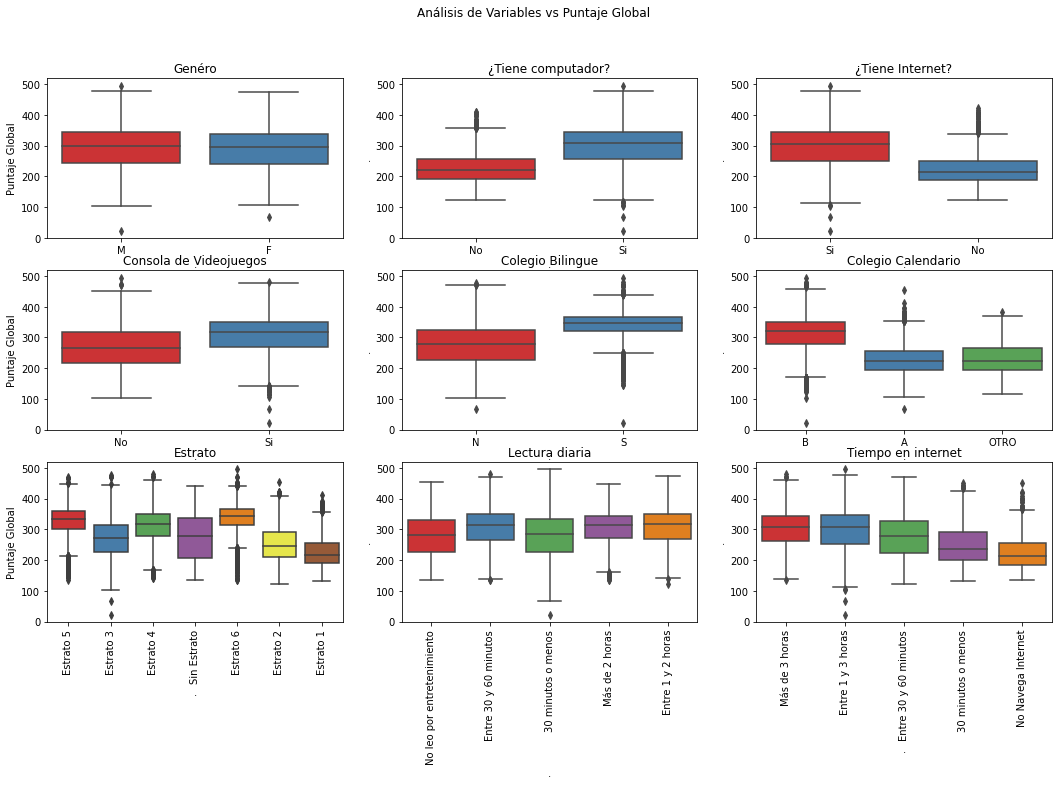

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
fig.suptitle('Análisis de Variables vs Puntaje Global')


sns.boxplot(ax=axes[0,0], x= df["ESTU_GENERO"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1")
axes[0,0].set_title("Genéro")
axes[0,0].set_xlabel('.')
axes[0,0].set_ylabel('Puntaje Global')

sns.boxplot(ax=axes[0,1], x= df["FAMI_TIENECOMPUTADOR"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[0,1].set_title("¿Tiene computador?")
axes[0,1].set_xlabel('.')
axes[0,1].set_ylabel('.')

sns.boxplot(ax=axes[0,2], x= df["FAMI_TIENEINTERNET"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[0,2].set_title("¿Tiene Internet?")
axes[0,2].set_xlabel('.')
axes[0,2].set_ylabel('.')


sns.boxplot(ax=axes[1,0], x= df["FAMI_TIENECONSOLAVIDEOJUEGOS"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[1,0].set_title("Consola de Videojuegos")
axes[1,0].set_xlabel('.')
axes[1,0].set_ylabel('Puntaje Global')


sns.boxplot(ax=axes[1,1], x= df["COLE_BILINGUE"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[1,1].set_title("Colegio Bilingue")
axes[1,1].set_xlabel('.')
axes[1,1].set_ylabel('.')

sns.boxplot(ax=axes[1,2], x= df["COLE_CALENDARIO"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[1,2].set_title("Colegio Calendario")
axes[1,2].set_xlabel('.')
axes[1,2].set_ylabel('.')


sns.boxplot(ax=axes[2,0], x= df["FAMI_ESTRATOVIVIENDA"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[2,0].set_title("Estrato")
axes[2,0].set_xlabel('.')
axes[2,0].set_ylabel('Puntaje Global')
axes[2,0].tick_params(axis="x", labelrotation = 90)


sns.boxplot(ax=axes[2,1], x= df["ESTU_DEDICACIONLECTURADIARIA"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[2,1].set_title("Lectura diaria")
axes[2,1].set_xlabel('.')
axes[2,1].set_ylabel('.')
axes[2,1].tick_params(axis="x", labelrotation = 90)

sns.boxplot(ax=axes[2,2], x= df["ESTU_DEDICACIONINTERNET"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[2,2].set_title("Tiempo en internet")
axes[2,2].set_xlabel('.')
axes[2,2].set_ylabel('.')
axes[2,2].tick_params(axis="x", labelrotation = 90)


Teniendo en cuenta que nuestro intéres es poder predecir el puntaje global de acuerdo a las diferentes variables socio-demográfica. Se realizó el análisis de cada variable vs puntaje global. 


De esta manera podemos evidenciar que las variables que si tiene un efecto en el puntaje global son: 


Calendario del colegio: los colegios de calendario tipo B, tienen un desempeño medio superior a los de tipo A y otro. 

Variable tales como: Si tiene computador e internet que pueden estar estrechamente relacionadas, tienen un efecto similar sobre el desempeño global. 


Asi mismo,  si un colegio es bilingue se podria afirmar que los estudiantes tendrian un mejor desempeño. 
 

*Con suma extrañeza si tiene consola de viadeojuegos evidenciamos que el desempeño es mejor, sin embargo podemos evidenciar que se cuenta con muchos outliers por lo tanto puede influir. 



# 2.2.Educación de los padres

Text(0.5, 0, 'Conteo')

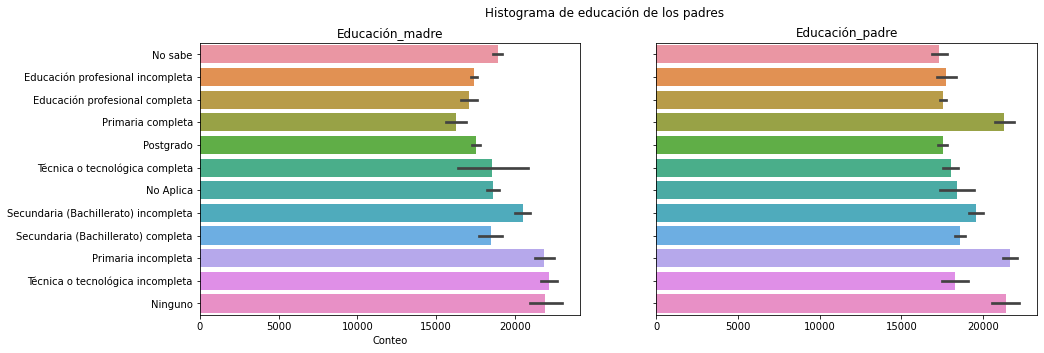

In [9]:

educacion_padre= df["FAMI_EDUCACIONPADRE"]
educacion_madre= df["FAMI_EDUCACIONMADRE"]

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Histograma de educación de los padres')

sns.barplot(ax=axes[0], x=educacion_madre.index, y=educacion_madre.values)
axes[0].set_title("Educación_madre")
axes[0].set_xlabel('Conteo')

sns.barplot(ax=axes[1], x=educacion_padre.index, y=educacion_padre.values)
axes[1].set_title("Educación_padre")
axes[0].set_xlabel('Conteo')


Text(0, 0.5, '.')

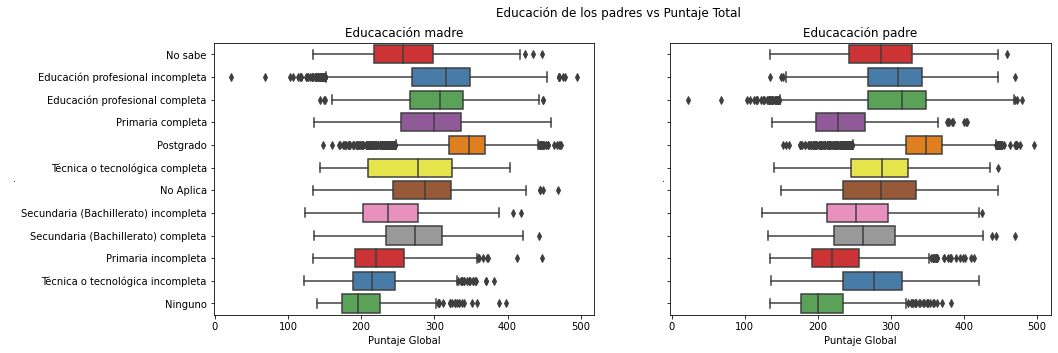

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Educación de los padres vs Puntaje Total')

sns.boxplot(ax=axes[0], y= df["FAMI_EDUCACIONMADRE"], x=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[0].set_title("Educacación madre")
axes[0].set_xlabel('Puntaje Global')
axes[0].set_ylabel('.')

sns.boxplot(ax=axes[1], y= df["FAMI_EDUCACIONPADRE"], x=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[1].set_title("Educacación padre")
axes[1].set_xlabel('Puntaje Global')
axes[1].set_ylabel('.')



En las gráficas anteriores, podemos evidenciar que al contar con estudios de postgrados tanto en el caso de los padres como de las madres, influye directamente en el desempeño global.

Mientras que niveles de estudio tales como,  primaria incompleta o técnica y tecnologìa imcompleta son las variables con un puntaje global inferior al resto. 


# 2.3. Departamento

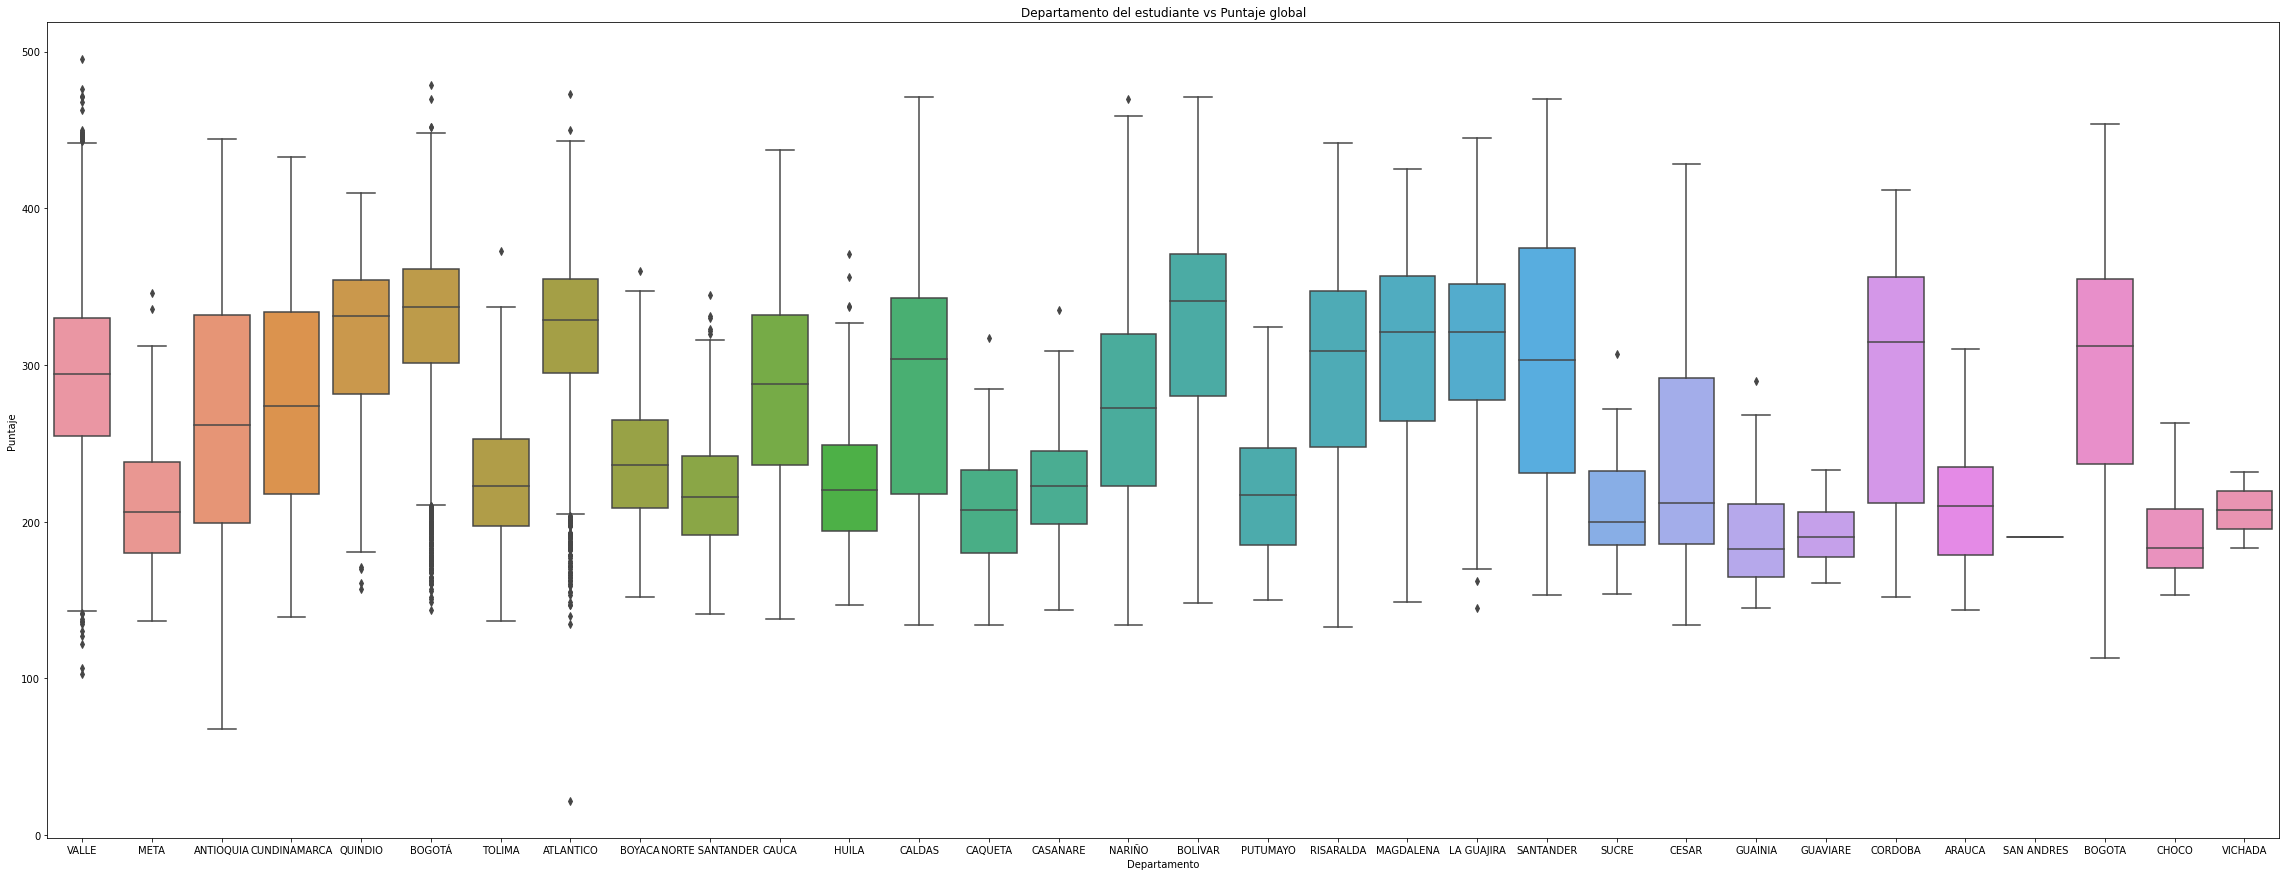

In [11]:
x = 40
y = 15
plt.figure(figsize = (x,y))
ax = sns.boxplot(x=df["ESTU_DEPTO_RESIDE"], y= df["PUNT_GLOBAL"],
                  linewidth=1.5 )
plt.title("Departamento del estudiante vs Puntaje global")
plt.ylabel("Puntaje")
plt.xlabel("Departamento")
plt.show();


In [12]:
df["PUNT_GLOBAL"].mean()

290.1588047308186

Con respecto al comportamiento de los resultados del puntaje global en los departamentos, se puede evidenciar: 

1. Los departamentos con mejor comportamiento se encuentran Bogotá, Quindio, Atlántico, Bolivar. 
2. Por otro lado departamentos como Valle, Caldas, Risaralda, Cordoba se encuentran por encima del promedio nacional. 
3. Finalmente no es de extrañarse que departamento con una alto indice de desigualdad social como: Putumayo, Caqueta, Guajira, Guaviare, Choco se encuentren por debajo del promedio nacional. 

## Alimentación:

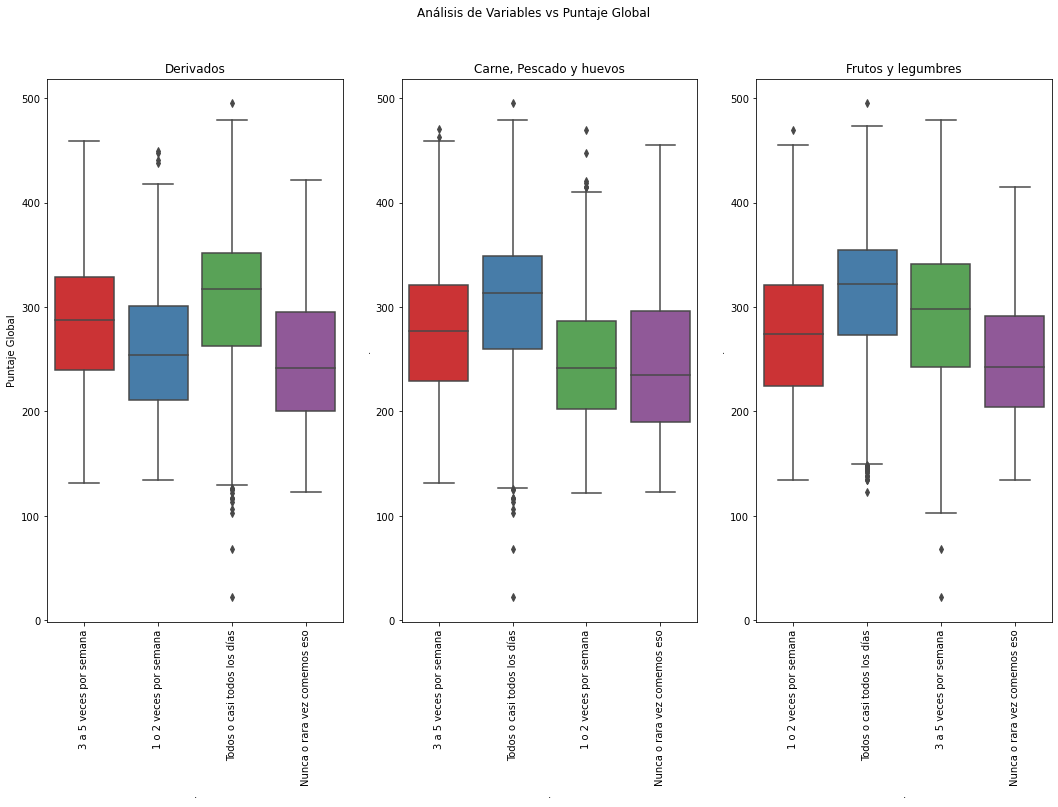

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Análisis de Variables vs Puntaje Global')


sns.boxplot(ax=axes[0], x= df["FAMI_COMELECHEDERIVADOS"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1")
axes[0].set_title("Derivados")
axes[0].set_xlabel('.')
axes[0].set_ylabel('Puntaje Global')
axes[0].tick_params(axis="x", labelrotation = 90)

sns.boxplot(ax=axes[1], x= df["FAMI_COMECARNEPESCADOHUEVO"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[1].set_title("Carne, Pescado y huevos")
axes[1].set_xlabel('.')
axes[1].set_ylabel('.')
axes[1].tick_params(axis="x", labelrotation = 90)

sns.boxplot(ax=axes[2], x= df["FAMI_COMECEREALFRUTOSLEGUMBRE"], y=df["PUNT_GLOBAL"],linewidth=1.5, palette="Set1" )
axes[2].set_title("Frutos y legumbres")
axes[2].set_xlabel('.')
axes[2].set_ylabel('.')
axes[2].tick_params(axis="x", labelrotation = 90)

Al tener en cuentas las variables de alimentación, no se ve una diferencia significativa entre si come derivados, pescado, carne o legumbres. 
Sin embargo si se puede afirmar que las personas que comen con una frecuencia de todos o casi todos los dìas, presentan un promedio global mayor. 

## 2.2.Variables númericas

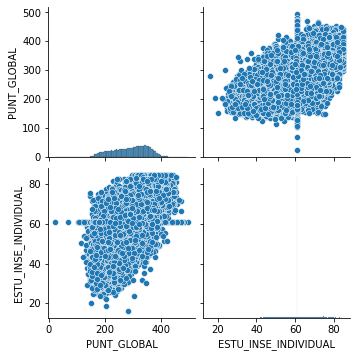

In [14]:
sns.pairplot(df[["PUNT_GLOBAL", "ESTU_INSE_INDIVIDUAL"]])
plt.show()

Con nuestras variables nùmericas, puntaje global e indice socioeconomico por individuo podemos afirmar que tienen una relación lineal positiva, es decir,  a mayor indice economico mayor su puntaje. 

## Conclusiones: 


De acuerdo con el análisis gráfico, se tendrán en cuenta las siguiente variables para la construcciòn del modelo de predicciòn, teniendo en cuenta que muestra un efecto sobre el puntaje global. 

1. Tiene computador. 
3. Estrato
4. Colegio Bilingue. 
5. Calendario del colegio. 
6. Departamento
7. Educación del padre y madre. 

Asi mismo la variable númerica de indice socioeconomico del individuo, al tener una relación lineal con nuestra variable de interes .


Entonces tomamos las variables anteriores como dependientes y la variable y: Puntaje Global para la construcciòn de una regresión lineal mùltiple

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

# 3.1 Modelo regresión Lineal Full

Para este primer análisis se realizarà una regresión lineal mùltiple teniendo en cuenta todas las variables:


1. Tengo que convertir las variables a dummies para hacer el análisis. 

In [15]:

df_new=df[['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE', 'FAMI_TIENECOMPUTADOR' , 'FAMI_TIENEINTERNET', 'FAMI_NUMLIBROS','ESTU_DEDICACIONLECTURADIARIA', 'COLE_BILINGUE','COLE_CALENDARIO','ESTU_DEDICACIONINTERNET',"ESTU_INSE_INDIVIDUAL"]]
df_new = pd.get_dummies(df_new, columns = ['ESTU_GENERO', 'ESTU_DEPTO_RESIDE', 'FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE', 'FAMI_TIENECOMPUTADOR' , 'FAMI_TIENEINTERNET', 'FAMI_NUMLIBROS','ESTU_DEDICACIONLECTURADIARIA', 'COLE_BILINGUE','COLE_CALENDARIO','ESTU_DEDICACIONINTERNET'],drop_first  = True )

df_new.head(5)


,ESTU_INSE_INDIVIDUAL,ESTU_GENERO_M,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,ESTU_DEPTO_RESIDE_BOGOTA,ESTU_DEPTO_RESIDE_BOGOTÁ,ESTU_DEPTO_RESIDE_BOLIVAR,ESTU_DEPTO_RESIDE_BOYACA,ESTU_DEPTO_RESIDE_CALDAS,ESTU_DEPTO_RESIDE_CAQUETA,...,ESTU_DEDICACIONLECTURADIARIA_Entre 30 y 60 minutos,ESTU_DEDICACIONLECTURADIARIA_Más de 2 horas,ESTU_DEDICACIONLECTURADIARIA_No leo por entretenimiento,COLE_BILINGUE_S,COLE_CALENDARIO_B,COLE_CALENDARIO_OTRO,ESTU_DEDICACIONINTERNET_Entre 1 y 3 horas,ESTU_DEDICACIONINTERNET_Entre 30 y 60 minutos,ESTU_DEDICACIONINTERNET_Más de 3 horas,ESTU_DEDICACIONINTERNET_No Navega Internet
0,60.953848,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,60.953848,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
2,60.953848,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,60.953848,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
4,60.953848,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0


In [16]:
# Se divide la data en entrenamiento y testeo (70-30)

Y= df['PUNT_GLOBAL']
X= df_new

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=125)

#validar dsitrbuciones de la data

Y_train.mean(), Y_test.mean(), Y_train.std(), Y_test.std()


(290.18558551527684, 290.0963219227968, 63.29835528969763, 63.93059955773252)

La media y la desviación estándar son similares para ambos grupos, por lo tanto se asume que la distribución es la misma en ambos grupos. 




In [17]:
from sklearn import datasets, linear_model


# Declaramos una instancia del modelo
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(X_train, Y_train)


lr.score(X_test, Y_test)

0.5683936247217288

In [18]:
import statsmodels.api as sm

X_train= sm.add_constant (X_train, prepend = True)
modelo1= sm.OLS (endog=Y_train, exog= X_train,)
modelo1= modelo1.fit()
print (modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:            PUNT_GLOBAL   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     435.7
Date:                Wed, 01 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:30:58   Log-Likelihood:            -1.3191e+05
No. Observations:               25627   AIC:                         2.640e+05
Df Residuals:                   25549   BIC:                         2.646e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

## Modelo reducido
para el siguiente modelo se seleccionaron las variables analizadas en la misión 2:


1. Tiene computador. 
2. Cuenta con Internet 
3. Estrato
4. Colegio Bilingue. 
5. Calendario del colegio.
6. Indice socieconomico. 



In [168]:



df_new2=df[['FAMI_ESTRATOVIVIENDA','COLE_BILINGUE',"ESTU_DEPTO_RESIDE",'COLE_CALENDARIO', "ESTU_INSE_INDIVIDUAL", 'FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE']]
df_new2= pd.get_dummies(df_new2, columns = ['FAMI_ESTRATOVIVIENDA','COLE_BILINGUE',"ESTU_DEPTO_RESIDE",'COLE_CALENDARIO', 'FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE'], drop_first  = True)
df_new2.head(5)



,ESTU_INSE_INDIVIDUAL,FAMI_ESTRATOVIVIENDA_Estrato 2,FAMI_ESTRATOVIVIENDA_Estrato 3,FAMI_ESTRATOVIVIENDA_Estrato 4,FAMI_ESTRATOVIVIENDA_Estrato 5,FAMI_ESTRATOVIVIENDA_Estrato 6,FAMI_ESTRATOVIVIENDA_Sin Estrato,COLE_BILINGUE_S,ESTU_DEPTO_RESIDE_ARAUCA,ESTU_DEPTO_RESIDE_ATLANTICO,...,FAMI_EDUCACIONMADRE_Ninguno,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta
0,60.953848,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,60.953848,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,60.953848,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.953848,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.953848,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [169]:


Y= df['PUNT_GLOBAL']
X= df_new2

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=125)

#validar dsitrbuciones de la data

Y_train.mean(), Y_test.mean(), Y_train.std(), Y_test.std()



(290.18558551527684, 290.0963219227968, 63.29835528969763, 63.93059955773252)

In [191]:

#X_train= sm.add_constant (X_train, prepend = True)
modelo2= sm.OLS (endog=Y_train, exog= X_train,)
modelo2= modelo2.fit()
print (modelo2.summary())


                                 OLS Regression Results                                
Dep. Variable:            PUNT_GLOBAL   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                          1.667e+04
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
Time:                        22:53:53   Log-Likelihood:                     -1.3436e+05
No. Observations:               25627   AIC:                                  2.688e+05
Df Residuals:                   25564   BIC:                                  2.694e+05
Df Model:                          63                                                  
Covariance Type:            nonrobust                                                  
                                                               coef    std err          t      P>|t|      [0.025      0.

In [170]:
from sklearn import datasets, linear_model

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=125)

# Declaramos una instancia del modelo
lr2 = linear_model.LinearRegression()

# Entrenamos el modelo
lr2.fit(X_train, Y_train)

lr2.score(X_test, Y_test)



0.5411546817752512

Se elige el modelo reducido teniendo en cuenta que su R cuadrado es muy cercano a 1, es decir, el modelo explica el 97% de la variabilidad. 
Mientras que el modelo full, con más variables, solo explica un valor menor. 
Incluso ambos modelos aciertan alrededor del mismo porcentaje. 

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.

# 4.1. Explicación manejo de herramienta: 

La siguiente herramienta interactiva, le permitirá a cualquier usuario ingresar variables de acuerdo su estatus socieconomico, de esta manera a traves de nuestro modelo elegido, calcula la predicciòn de su puntaje global, teniendo en cuenta las variables.

En cada variable se debe seleccionar su respuesta más cercana y en la parte inferior aparecera la predicción del puntaje. 


In [ ]:
#Declaramos la barra deslizante y las listas desplegables. En primer lugar, declaramos la barra deslizante que hace referencia al número de huéspedes por alojamiento.


import ipywidgets as widgets
import pandas as pd
import plotly.graph_objects as go

In [202]:


Estrato = widgets.Dropdown(options= sorted(df["FAMI_ESTRATOVIVIENDA"].unique()), description= "Estrato:",value="Estrato 2")
Bilingue = widgets.Dropdown(options= sorted(df["COLE_BILINGUE"].unique()), description= "¿Su colegio es bilingue?",value="S")
Departamento_residencia = widgets.Dropdown(options= sorted(df["ESTU_DEPTO_RESIDE"].unique()), description= "Departamento",value="BOGOTA")
Colegio_calendario = widgets.Dropdown(options= sorted(df["COLE_CALENDARIO"].unique()), description= "Calendario",value="B")
Educacion_padre = widgets.Dropdown(options= sorted(df["FAMI_EDUCACIONPADRE"].unique()), description= "Educacion padre",value="No sabe")
Educacion_madre = widgets.Dropdown(options= sorted(df["FAMI_EDUCACIONMADRE"].unique()), description= "Educacion madre",value="No sabe")
Indice_socioeconomico = widgets.IntSlider(options= sorted(df["ESTU_INSE_INDIVIDUAL"].unique()),description= "Indice_socioeconomico" )



aW = widgets.FloatText(description="Puntaje Global")

def change_a(_):
    Cod_Estrato=0
    Cod_Bilingue=0
    Cod_Departamento_residencia=0
    Cod_Colegio_calendario=0
    Cod_Educacion_padre=0
    Cod_Educacion_madre=0
    
    parametros=modelo2.params
    
    if Estrato.value!='Estrato 1':
        Cod_Estrato=parametros["FAMI_ESTRATOVIVIENDA_"+str(Estrato.value)]
    if Bilingue.value!= "N":
        Cod_Bilingue=parametros["COLE_BILINGUE_"+str(Bilingue.value)]
    if Departamento_residencia.value!="ANTIOQUIA":
        Cod_Departamento_residencia=parametros["ESTU_DEPTO_RESIDE_"+str(Departamento_residencia.value)]
    if Colegio_calendario.value!= "A":
        Cod_Colegio_calendario=parametros["COLE_CALENDARIO_"+str(Colegio_calendario.value)]
    if Educacion_padre.value!= "Educación profesional incompleta":
        Cod_Educacion_padre= parametros["FAMI_EDUCACIONPADRE_"+str(Educacion_padre.value)]
    if Educacion_madre!= "Educación profesional incompleta":
        Cod_Educacion_madre= parametros["FAMI_EDUCACIONMADRE_"+str(Educacion_madre.value)]
    
    aW.value = int(Indice_socioeconomico.value)*parametros["ESTU_INSE_INDIVIDUAL"]+Cod_Estrato+Cod_Bilingue+Cod_Departamento_residencia+Cod_Educacion_padre+Cod_Educacion_madre+Cod_Colegio_calendario
    #aW.value = Cod_Bilingue
    

Indice_socioeconomico.observe(change_a)
Bilingue.observe(change_a)
Departamento_residencia.observe(change_a)
Colegio_calendario.observe(change_a)
Educacion_padre.observe(change_a)
Educacion_madre.observe(change_a)
Estrato.observe(change_a)

display(widgets.VBox([aW,Bilingue,Estrato ,Departamento_residencia, 
                               Colegio_calendario,Educacion_padre, Educacion_madre,Indice_socioeconomico]))



